In [46]:
pip install selenium


  Using cached selenium-4.26.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached trio-0.27.0-py3-none-any.whl.metadata (8.6 kB)
  Using cached trio_websocket-0.11.1-py3-none-any.whl.metadata (4.7 kB)
  Using cached outcome-1.3.0.post0-py2.py3-none-any.whl.metadata (2.6 kB)
Using cached selenium-4.26.1-py3-none-any.whl (9.7 MB)
Using cached trio-0.27.0-py3-none-any.whl (481 kB)
Using cached trio_websocket-0.11.1-py3-none-any.whl (17 kB)
Using cached outcome-1.3.0.post0-py2.py3-none-any.whl (10 kB)


In [6]:
pip install -q webdriver-manager

Note: you may need to restart the kernel to use updated packages.


In [3]:
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.keys import Keys

# Setup webdriver
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)
url = "https://www.youtube.com/watch?v=qcIKcd-3f5A"

# Open YouTube video page
driver.get(url)

# Give time to load comments
time.sleep(3)

# Scroll to load comments
driver.find_element(By.TAG_NAME, 'body').send_keys(Keys.PAGE_DOWN)
time.sleep(3)

# Retrieve comments
comments = driver.find_elements(By.XPATH, '//*[@id="content-text"]')
comment_texts = [comment.text for comment in comments]

# Close the driver
driver.quit()

comment_texts

['Gilee bang Indra gercep abis wkwkw padahal kemaren baru aja unboxing MacBook',
 'Device paling worth for money.. performance.. price.. durabilitas.. dan gengsi ..bersatu \nsaran saya sih abis CO ini langsung beli UPS biar bisa awet sampai 5 tahun',
 'Pernah baca artikel terkait penempatan tombol dibawah. Karena byk orang pakai pc atau laptop itu di sleep aja ga di-shutdown. Jadi desain mac ini berbasis data dari pergeseran kebiasaan user tersebut.',
 'mas aku mau coba produk apple, tapi varian-varian yang dijual di toko-toko Indonesia ga sesuai dengan kebutuhannya, gimana ya cara belinya dari official storenya Apple biar bisa custom speknya biar sesuai',
 'Pengeeennn bangeeettt  \nMudah²an kita yang nonton video ini bisa kebeli MAC Mini M4 tahun ini... Aamiin...',
 'bang, kira kira macmini bisa digabung sama visionpro ga? kalo bisa udah gila bgt',
 'bang ini kalo di mode sleep, terus kita pindah tempat (misal dari rumah ke kantor), itu pas dinyalain lagi, masih mode sleep ga ya? seca

In [4]:
# Import necessary libraries for sentiment analysis
from textblob import TextBlob

# Make sure 'comment_texts' is defined
try:
    comment_texts
except NameError:
    # Code to retrieve comments if not already executed
    import time
    from selenium import webdriver
    from selenium.webdriver.common.by import By
    from selenium.webdriver.chrome.service import Service
    from webdriver_manager.chrome import ChromeDriverManager
    from selenium.webdriver.common.keys import Keys

    # Setup webdriver
    service = Service(ChromeDriverManager().install())
    driver = webdriver.Chrome(service=service)
    url = "https://www.youtube.com/watch?v=qcIKcd-3f5A"

    # Open YouTube video page
    driver.get(url)

    # Give time to load comments
    time.sleep(3)

    # Scroll to load comments
    driver.find_element(By.TAG_NAME, 'body').send_keys(Keys.PAGE_DOWN)
    time.sleep(3)

    # Retrieve comments
    comments = driver.find_elements(By.XPATH, '//*[@id="content-text"]')
    comment_texts = [comment.text for comment in comments]

    # Close the driver
    driver.quit()

# Perform sentiment analysis
sentiments = []
for comment in comment_texts:
    analysis = TextBlob(comment)
    sentiments.append(analysis.sentiment.polarity)

# Output the sentiment scores
sentiments

[0.0,
 0.3,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.1,
 0.0,
 0.9,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5]

In [10]:
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment

# Sample text to analyze sentiment
text = "This is a fantastic product with amazing features!"
result = analyze_sentiment(text)
result

Sentiment(polarity=0.5750000000000001, subjectivity=0.9)

In [17]:
pip install wordcloud

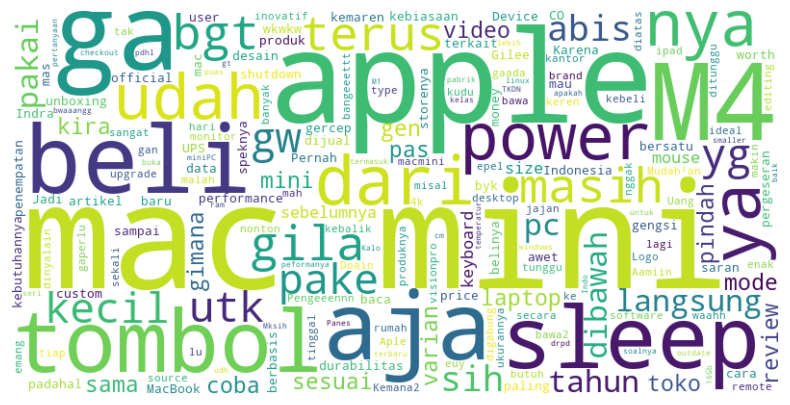

In [37]:
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ensure 'comment_texts' is defined
try:
    comment_texts
except NameError:
    comment_texts = []  # Replace with your existing comment retrieval code if needed

# Define a list of words to remove from the comments
# English and Indonesian stopwords; focusing on people, self-calling, and non-relevant words concerning the context
words_to_remove = [
    'saya', 'aku', 'kami', 'kita', 'anda', 'kamu', 'kalian', 'mereka', 'dia', 'beliau', 'orang', 
    'dirinya', 'punya', 'memiliki', 'kalau', 'bisa', 'akan', 'dapat', 'bagaimana', 'apa', 'itu', 
    'ini', 'tidak', 'dengan', 'karena', 'tapi', 'namun', 'dan', 'atau', 'jika', 'jikalau', 'sehingga', 
    'tersebut', 'jadi', 'adalah', 'sudah', 'yang', 'berada', 'dimana', 'kapan', 'siapa', 'mengapa', 
    'bagaimanapun', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", 
    'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 
    'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 
    'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 
    'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 
    'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 
    'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 
    'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 
    'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 
    'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 
    'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 
    'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', 
    "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 
    'won', "won't", 'wouldn', "wouldn't",'bang',"kalo",'di',"biar","buat",'tempat','kan'
]

# Join all comments into a single string
text = " ".join(comment_texts)

# Remove specified words using regex
pattern = r'\b(?:' + '|'.join(map(re.escape, words_to_remove)) + r')\b'
filtered_text = re.sub(pattern, '', text)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [51]:
from collections import Counter
import pandas as pd
import re

def count_words_grouped(text):
    # Define a list of words to remove from the comments
    words_to_remove = [
        'saya', 'aku', 'kami', 'kita', 'anda', 'kamu', 'kalian', 'mereka', 'dia', 'beliau', 'orang', 
        'dirinya', 'punya', 'memiliki', 'kalau', 'bisa', 'akan', 'dapat', 'bagaimana', 'apa', 'itu', 
        'ini', 'tidak', 'dengan', 'karena', 'tapi', 'namun', 'dan', 'atau', 'jika', 'jikalau', 'sehingga', 
        'tersebut', 'jadi', 'adalah', 'sudah', 'yang', 'berada', 'dimana', 'kapan', 'siapa', 'mengapa', 
        'bagaimanapun', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", 
        'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 
        'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 
        'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 
        'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 
        'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 
        'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 
        'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 
        'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 
        'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 
        'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 
        'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', 
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 
        'won', "won't", 'wouldn', "wouldn't",'bang',"kalo",'di',"biar","buat",'tempat','kan'
    ]
    
    # Remove specified words using regex
    pattern = r'\b(?:' + '|'.join(map(re.escape, words_to_remove)) + r')\b'
    filtered_text = re.sub(pattern, '', text)

    # Split the filtered text into words and filter out any empty strings
    words = [word for word in filtered_text.split() if word]
    # Count occurrences of each word
    word_counts = Counter(words)
    return word_counts

# Assuming 'text' is defined earlier in the notebook
word_counts = count_words_grouped(text)

# Convert the word counts to a DataFrame for tabular display
word_counts_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Count'])

# Display the DataFrame as a table showing the top 20 most common words
word_counts_df = word_counts_df.sort_values(by='Count', ascending=False).reset_index(drop=True)
word_counts_df.head(20)

,Word,Count
0,mini,7
1,mac,6
2,nya,3
3,Mini,3
4,power,3
5,udah,3
6,dari,3
7,ga,3
8,",",3
9,bgt,3
